In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('breast_cancer.csv')

In [3]:
df.head()

,Unnamed: 0,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,cancer_type
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant
2,2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malignant
3,3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malignant
4,4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant


In [4]:
df.shape

(569, 32)

In [5]:
df.describe()

,Unnamed: 0,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,284.000000,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,164.400426,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,142.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,284.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,426.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,568.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
df['cancer_type'].value_counts()

cancer_type
benign       357
malignant    212
Name: count, dtype: int64

In [7]:
df['cancer_type'] = df['cancer_type'].replace({'benign':0, 'malignant':1})

In [8]:
df = df.drop('Unnamed: 0', axis=1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [10]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
cancer_type                0
dtype: int64

In [11]:
df.eq(0).sum()

mean radius                  0
mean texture                 0
mean perimeter               0
mean area                    0
mean smoothness              0
mean compactness             0
mean concavity              13
mean concave points         13
mean symmetry                0
mean fractal dimension       0
radius error                 0
texture error                0
perimeter error              0
area error                   0
smoothness error             0
compactness error            0
concavity error             13
concave points error        13
symmetry error               0
fractal dimension error      0
worst radius                 0
worst texture                0
worst perimeter              0
worst area                   0
worst smoothness             0
worst compactness            0
worst concavity             13
worst concave points        13
worst symmetry               0
worst fractal dimension      0
cancer_type                357
dtype: int64

In [12]:
df[['mean concavity','mean concave points','concavity error','concave points error','worst concavity','worst concave points']] = \
df[['mean concavity','mean concave points','concavity error','concave points error','worst concavity','worst concave points']].replace(0,np.NaN)

In [13]:
#df = df.astype(int)

In [14]:
df.fillna(df.mean(), inplace=True)

In [15]:
df.eq(0).sum()

mean radius                  0
mean texture                 0
mean perimeter               0
mean area                    0
mean smoothness              0
mean compactness             0
mean concavity               0
mean concave points          0
mean symmetry                0
mean fractal dimension       0
radius error                 0
texture error                0
perimeter error              0
area error                   0
smoothness error             0
compactness error            0
concavity error              0
concave points error         0
symmetry error               0
fractal dimension error      0
worst radius                 0
worst texture                0
worst perimeter              0
worst area                   0
worst smoothness             0
worst compactness            0
worst concavity              0
worst concave points         0
worst symmetry               0
worst fractal dimension      0
cancer_type                357
dtype: int64

In [16]:
df.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,cancer_type
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.651382,0.798004,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.496002,0.715503,0.163953,0.007066,0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.314783,0.308032,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.316484,0.319025,0.105008,0.119205,0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.690999,0.826612,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.533330,0.743003,0.189115,0.051019,0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.667709,0.806682,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.489614,0.703627,0.143570,0.003738,0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.509108,0.540851,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.419565,0.488964,0.394309,0.499316,0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.867554,0.814447,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.799263,0.800349,0.510223,0.687382,0.596534
mean concavity,0.651382,0.314783,0.690999,0.667709,0.509108,0.867554,1.000000,0.918966,0.503304,0.349991,...,0.303935,0.707320,0.660512,0.432879,0.735907,0.880421,0.859103,0.402254,0.510334,0.686318
mean concave points,0.798004,0.308032,0.826612,0.806682,0.540851,0.814447,0.918966,1.000000,0.465899,0.179439,...,0.297904,0.834712,0.796132,0.435724,0.645824,0.742496,0.908038,0.367831,0.361803,0.768315
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.503304,0.465899,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.436981,0.438804,0.699826,0.438413,0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.349991,0.179439,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.363013,0.195052,0.334019,0.767297,-0.012838


<Axes: >

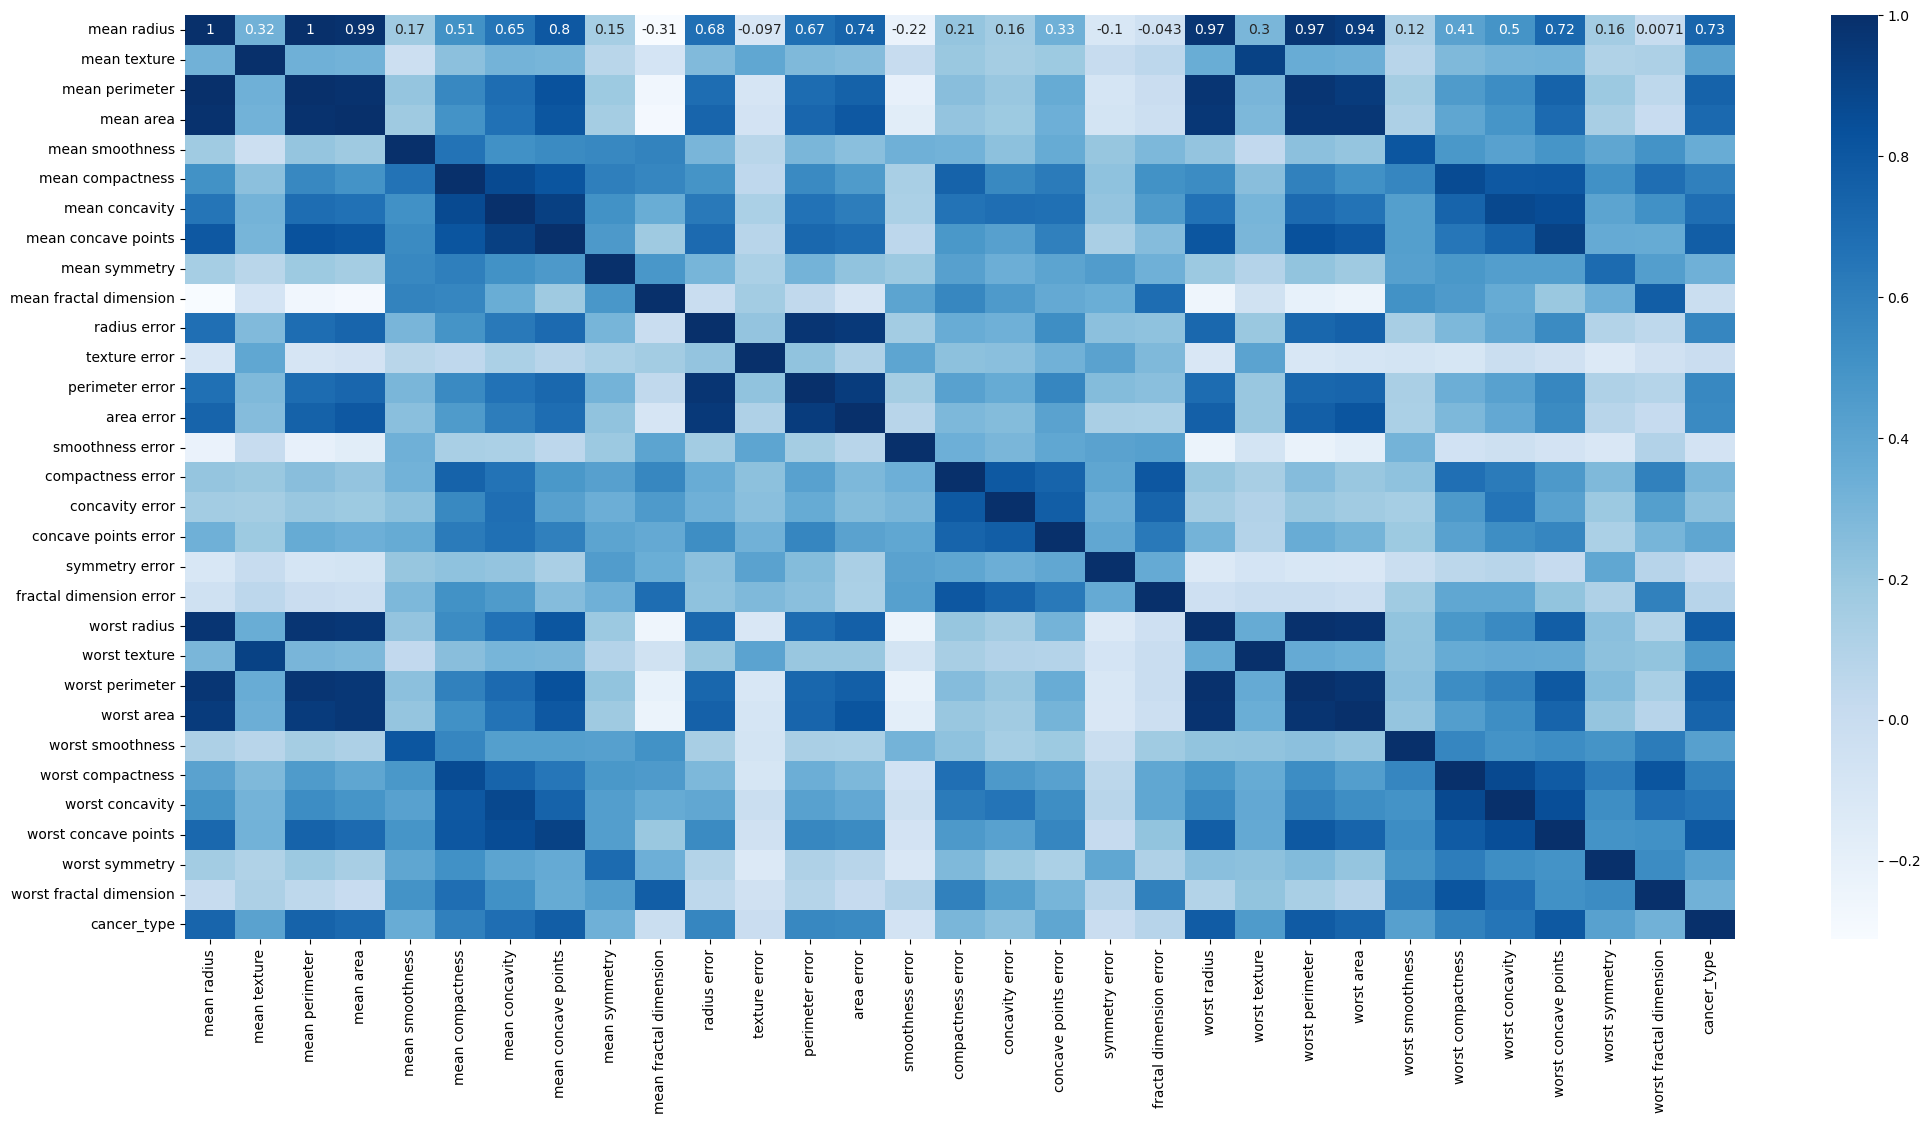

In [17]:
plt.figure(figsize = (25, 12))
sns.heatmap(df.corr(), annot=True, fmt='.2g', cmap='Blues')


In [18]:
df.corr().nlargest(5, 'cancer_type').index

Index(['cancer_type', 'worst concave points', 'worst perimeter',
       'worst radius', 'mean concave points'],
      dtype='object')

In [19]:
df.corr().nlargest(5, 'cancer_type').values[:,30]

array([1.        , 0.79079665, 0.78291414, 0.77645378, 0.76831544])

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.090876,0.078553,0.000692,0.031360,0.066640,0.130700,0.42680
mean concave points,569.0,0.050063,0.038074,0.001852,0.021070,0.037000,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [22]:
X = df[['worst concave points', 'worst perimeter', 'worst radius', 'mean concave points']]

In [23]:
y = df.iloc[:, 30]

In [24]:
log_reg = LogisticRegression()
log_reg_score = cross_val_score(log_reg, X,y, cv=10, scoring= 'accuracy').mean()

In [25]:
log_reg_score

0.9174498746867167

In [26]:
result = []
result.append(log_reg_score)

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
cv_scores = []

In [29]:
folds = 10

In [30]:
ks = list(range(1,int(len(X) * ((folds-1)/folds)), 2))

In [31]:
for k in ks:
    knn = KNeighborsClassifier(n_neighbors = k)
    score = cross_val_score(knn, X,y, cv=folds, scoring= 'accuracy').mean()
    cv_scores.append(score)

In [32]:
knn_score = max(cv_scores)
knn_score

0.9209273182957393

In [33]:
optimal_k = ks[cv_scores.index(knn_score)]
optimal_k

159

In [34]:
result.append(knn_score)

In [35]:
from sklearn import svm 

In [36]:
linear_svm = svm.SVC(kernel='linear') 
linear_svm_score = cross_val_score(linear_svm, X, y, cv=10, scoring='accuracy').mean()

In [37]:
linear_svm_score

0.9174498746867167

In [38]:
result.append(linear_svm_score)

In [39]:
rbf = svm.SVC(kernel = 'rbf')

In [40]:
rbf_score = cross_val_score(rbf, X,y, cv=10, scoring='accuracy').mean()

In [41]:
rbf_score

0.9139411027568922

In [42]:
result.append(rbf_score)

### ALL MODELS

In [43]:
algorithms = ['Logistic Regression', 'K Nearest Neighbors', 'SVM Linear Kernel', 'SVM RBF Kernel']

In [44]:
cv_mean = pd.DataFrame(result, index= algorithms) 

In [45]:
cv_mean.columns = ['accuracy']
cv_mean.sort_values(by= 'accuracy', ascending= False)

,accuracy
K Nearest Neighbors,0.920927
Logistic Regression,0.917450
SVM Linear Kernel,0.917450
SVM RBF Kernel,0.913941


In [87]:
df= df.rename(columns={'worst concave points':'Worst_Concave_Points', 'worst perimeter':'Worst_Parameter', 'worst radius':'Worst_Radius', 'mean concave points':'Mean_Concave_Points'})

In [88]:
knn = KNeighborsClassifier(n_neighbors = 159)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=159)

In [89]:
import pickle

In [90]:
filename = 'breast_cancer_new.sav'

In [91]:
pickle.dump(knn, open(filename, 'wb'))

In [92]:
loaded_model  = pickle.load(open(filename, 'rb'))

In [93]:
df['cancer_type'].value_counts()

cancer_type
0    357
1    212
Name: count, dtype: int64

In [94]:
pd.set_option('display.max_columns', None)

In [95]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean_concave_points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst_radius,worst texture,worst_parameter,worst area,worst smoothness,worst compactness,worst concavity,worst_concave_points,worst symmetry,worst fractal dimension,cancer_type
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.053730,0.015870,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.711900,0.265400,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.018600,0.013400,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.241600,0.186000,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.038320,0.020580,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.450400,0.243000,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.056610,0.018670,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.686900,0.257500,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.056880,0.018850,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.400000,0.162500,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.243900,0.138900,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.051980,0.024540,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.410700,0.221600,0.2060,0.07115,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.144000,0.097910,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.039500,0.016780,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.321500,0.162800,0.2572,0.06637,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.092510,0.053020,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.047300,0.015570,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.340300,0.141800,0.2218,0.07820,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.351400,0.152000,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.071170,0.016640,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.938700,0.265000,0.4087,0.12400,1


In [97]:
Worst_Concave_Points = 0.55400
Worst_Parameter = 19.60
Worst_Radius = 5.990
Mean_Concave_Points = 0.52000

In [98]:
prediction = loaded_model.predict([[worst_concave_points, worst_parameter, worst_radius, mean_concave_points]])
print(prediction)
if (prediction[0] == 0):
    print('Malignant')
else:
    print('Benign')


[0]
Malignant


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [99]:
proba = loaded_model.predict_proba([[worst_concave_points, worst_parameter, worst_radius, mean_concave_points]])
print(proba)
print('Confidence :' + str(round(np.amax(proba[0]) * 100, 2)) + '%')

[[0.99371069 0.00628931]]
Confidence :99.37%


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [100]:
worst_concave_points = 0.55400
worst_parameter = 120.60
worst_radius = 5.990
mean_concave_points = 0.52000

In [101]:
prediction = loaded_model.predict([[worst_concave_points, worst_parameter, worst_radius, mean_concave_points]])
print(prediction)
if (prediction[0] == 0):
    print('Malignant')
else:
    print('Benign')

[1]
Benign


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


I See the worst_parameter is high So cancer chance impact very high.

In [102]:
proba = loaded_model.predict_proba([[worst_concave_points, worst_parameter, worst_radius, mean_concave_points]])
print(proba)
print('Confidence :' + str(round(np.amax(proba[0]) * 100, 2)) + '%')

[[0.3836478 0.6163522]]
Confidence :61.64%


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [ ]:
from flask import Flask, request, jsonify
import pickle

app = Flask(__name__)

# Load the pre-trained model (Assume it is a collaborative filtering model)
with open('movie_recommendation_model.pkl', 'rb') as file:
    model = pickle.load(file)

# Define a route for predictions
@app.route('/recommend', methods=['POST'])
def recommend():
    # Get movie input from the user
    data = request.json
    movie_title = data.get('movie_title')

    # Get recommendations (use your model's recommendation function)
    recommendations = get_recommendations(movie_title)

    return jsonify({'recommended_movies': recommendations})

if __name__ == '__main__':
    app.run(debug=True)
